<a href="https://colab.research.google.com/github/MorganPeju/inf8225_project/blob/main/Projet_INF8225.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projet INF8225

### Equipe :
- Renaud Lespérance
- Gabriel Poupart
- Chu Ka Hei
- Morgan Péju

# Import

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree
from google.colab.patches import cv2_imshow

# YOLOv3 test
The code for this section was taken from :

https://medium.com/analytics-vidhya/object-detection-with-opencv-python-using-yolov3-481f02c6aa35

In [ ]:
#https://medium.com/analytics-vidhya/object-detection-with-opencv-python-using-yolov3-481f02c6aa35
#weights = https://pjreddie.com/media/files/yolov3.weights
!wget -N https://pjreddie.com/media/files/yolov3.weights
# for github file take the URL of the raw preview and not the HTML
!wget -N https://raw.githubusercontent.com/pjreddie/darknet/b1ab3da442574364f82c09313a58f7fc93cea2bd/data/coco.names
!wget -N https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2022-03-20 17:23:45--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘yolov3.weights’ not modified on server. Omitting download.

--2022-03-20 17:23:46--  https://raw.githubusercontent.com/pjreddie/darknet/b1ab3da442574364f82c09313a58f7fc93cea2bd/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2022-03-20 17:23:46 (14.2 MB/s) - ‘coco.names’ saved [625/625]

--2022-03-20 17:23

In [ ]:
#Load Yolo
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
classes = []
with open("coco.names","r") as f:
  classes = [line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0]-1]for i in net.getUnconnectedOutLayers()]

for details.

--2022-03-20 18:26:10--  https://th.bing.com/th/id/R.c78b17290d1abf81e2d01962692b5738?rik=wIQXWI4MiTHxwg
Resolving th.bing.com (th.bing.com)... 204.79.197.200, 13.107.21.200, 2620:1ec:c11::200
Connecting to th.bing.com (th.bing.com)|204.79.197.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413518 (404K) [image/png]
Saving to: ‘image1.jpg’

image1.jpg          100%[===================>] 403.83K  --.-KB/s    in 0.05s   

2022-03-20 18:26:10 (7.51 MB/s) - ‘image1.jpg’ saved [413518/413518]



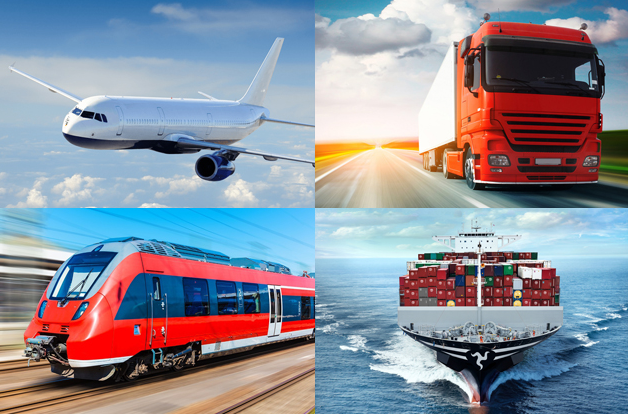

In [ ]:
# Get a image
!wget -N -O image1.jpg https://th.bing.com/th/id/R.c78b17290d1abf81e2d01962692b5738?rik=wIQXWI4MiTHxwg&pid=ImgRaw&r=0&sres=1&sresct=1
img = "image1.jpg"
img = cv2.imread(img) # reads image
# img = cv2.resize(img,None,fx=0.5,fy=0.5)
height,weidth,channels = img.shape
cv2_imshow(img)

In [ ]:
#feature extraction
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=True)

#propagation
net.setInput(blob)
outs = net.forward(outputlayers)

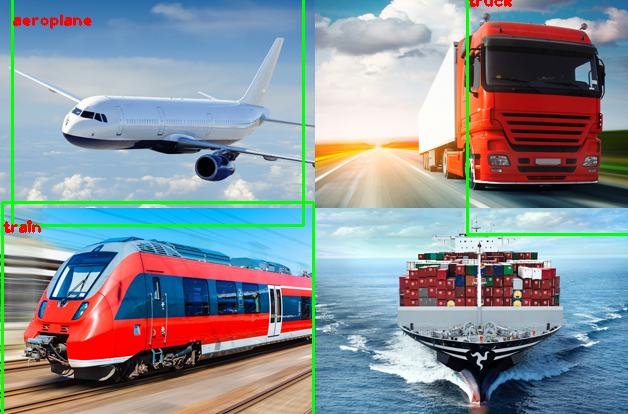

In [ ]:
class_ids = []
confidences=[]
min_confidences = 0.5
boxes =[]
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > min_confidences :
      center_x = int(detection[0]*weidth)
      center_y = int(detection[1]*height)
      w = int(detection[2]*weidth)
      h = int(detection[3]*weidth)

      # cv2.circle(img,(center_x,center_y),10,(0,255,0),2)

      x=int(center_x - w/2)
      y=int(center_y -h/2)
      boxes.append((x,y,w,h))
      confidences.append(float(confidence))
      class_ids.append(class_id)
font = cv2.FONT_HERSHEY_PLAIN
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)
for i,boxe in enumerate(boxes):
  if i in indexes:
    x,y,w,h = boxe
    label = str(classes[class_ids[i]])
    # color = colors[i]
    color = (0,255,0) #green
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.putText(img,label,(x,y+30),font,1,(0,0,255),2)
cv2_imshow(img)

In [ ]:
# Dataset import

# Dataset import

https://github.com/aiformankind/wildfire-smoke-dataset

Use up-to-date version of gdown to allow downloading a large file from google drive. The older version or the wget library does not work with files recognized as a virus when they are compressed and too large to be scanned by google.

In [ ]:
!pip install --upgrade --no-cache-dir gdown #NEED to uptade gdown to download dataset

In [4]:
! gdown 1sEB77bfp2yMkgsSW9703vwDHol_cK6D5 -O smoke_datasets_V1.tar.gz
! gunzip smoke_datasets_V1.tar.gz
! mkdir -p datasets
! tar -xf  'smoke_datasets_V1.tar' -C 'datasets'
! rm smoke_datasets_V1.tar

Downloading...
From: https://drive.google.com/uc?id=1sEB77bfp2yMkgsSW9703vwDHol_cK6D5
To: /content/smoke_datasets_V1.tar.gz
100% 28.6M/28.6M [00:00<00:00, 86.0MB/s]


width : 640 ; height : 480 ; depth : 3
xmin : 448 ; ymin : 196 ; xmax : 539 ; ymin : 196


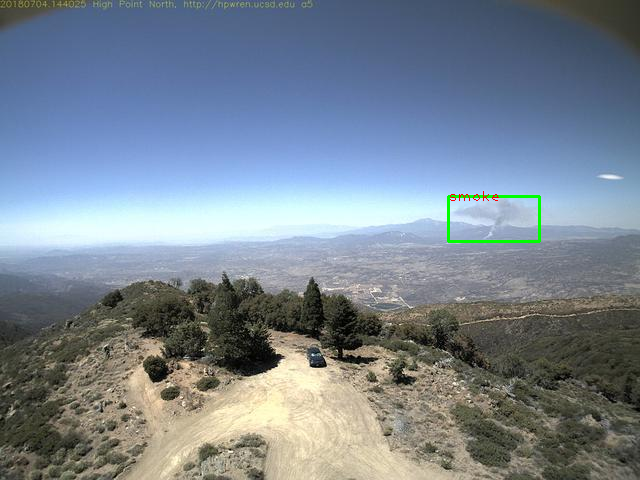

In [37]:
datasets_path = "datasets/annotated_bounding_box_hpwren"
file_name = "ck0k99e6p79go0944lmxivkmv"
img = cv2.imread(f"{datasets_path}/images/{file_name}.jpeg") # reads image
# cv2_imshow(img)
tree = etree.parse(f"{datasets_path}/xmls/{file_name}.xml")
root = tree.getroot()
size = root[4]
box = root[6][4]
label = root[6][0].text
width,height,depth = int(size[0].text),int(size[1].text),int(size[2].text)
xmin,ymin,xmax, ymax = int(box[0].text),int(box[1].text),int(box[2].text),int(box[3].text)
print(f"width : {width} ; height : {height} ; depth : {depth}")
print(f"xmin : {xmin} ; ymin : {ymin} ; xmax : {xmax} ; ymin : {ymin}")

color = (0,255,0) #green
cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color,2)
font = cv2.FONT_HERSHEY_PLAIN
cv2.putText(img,label,(xmin,ymin+5),font,1,(0,0,255),1)
cv2_imshow(img)

In [ ]:
: